In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resnet/tensorflow2/default/1/densenet121_weights_tf_dim_ordering_tf_kernels_notop (1).h5
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_22.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_53.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_69.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_68.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_51.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_88.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_4.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_75.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_16.jpg
/kaggle/input/microorganism-image-classification/Micro_Organism/Amoeba/Image_72.jpg
/kaggle/input/microorganism-image-classification/Micro_Org

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

In [20]:
import os
import shutil

# Define paths for input data and output
input_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"  # Correct path
output_path = "/kaggle/working/data"

# Define paths for train, val, test
train_path = os.path.join(output_path, "train")
val_path = os.path.join(output_path, "val")
test_path = os.path.join(output_path, "test")

# Create main directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Classes (update based on actual folders)
classes = ["Amoeba", "Euglena", "Hydra", "Paramecium", "Rod_bacteria", "Spherical_bacteria", "Spiral_bacteria", "Yeast"]

# Create class subfolders in train, val, test
for class_name in classes:
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)

# Organize data
for class_name in classes:
    class_dir = os.path.join(input_path, class_name)

    if not os.path.exists(class_dir):
        print(f"Class directory '{class_name}' does not exist in {input_path}. Skipping...")
        continue

    images = os.listdir(class_dir)

    # Skip classes with less than 2 images
    if len(images) < 2:
        print(f"Skipping class '{class_name}' due to insufficient data.")
        continue

    for img in images:
        source = os.path.join(class_dir, img)
        destination = os.path.join(train_path, class_name, img)  # Customize splitting logic if needed
        shutil.copy(source, destination)

    print(f"Class '{class_name}' processed successfully.")



Class 'Amoeba' processed successfully.
Class 'Euglena' processed successfully.
Class 'Hydra' processed successfully.
Class 'Paramecium' processed successfully.
Class 'Rod_bacteria' processed successfully.
Class 'Spherical_bacteria' processed successfully.
Class 'Spiral_bacteria' processed successfully.
Class 'Yeast' processed successfully.


Classes found: ['Amoeba', 'Euglena', 'Spherical_bacteria', 'Hydra', 'Rod_bacteria', 'Spiral_bacteria', 'Paramecium', 'Yeast']


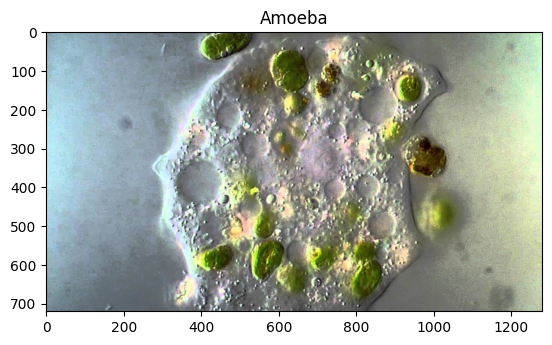

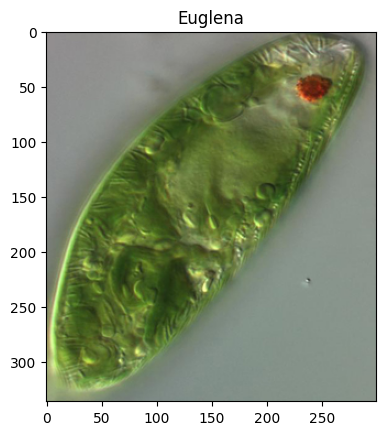

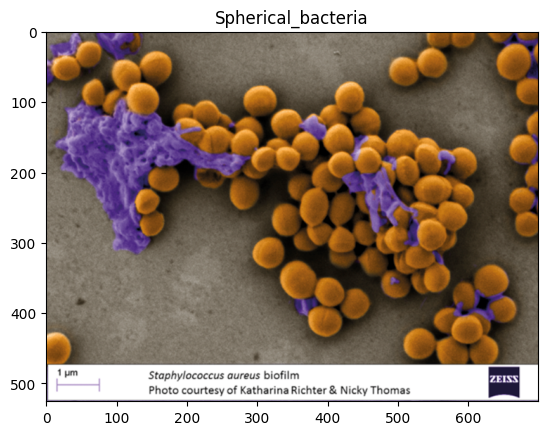

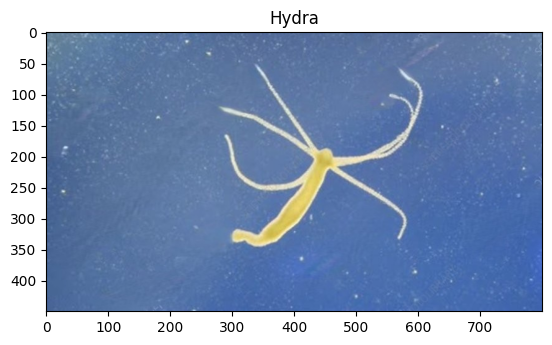

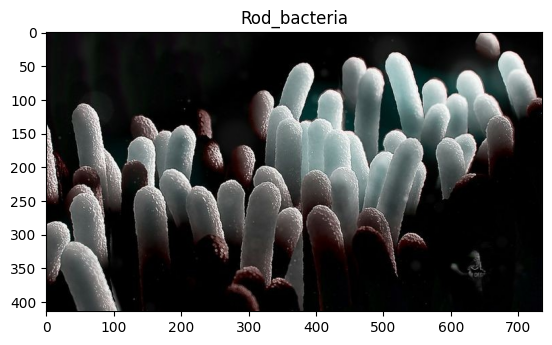

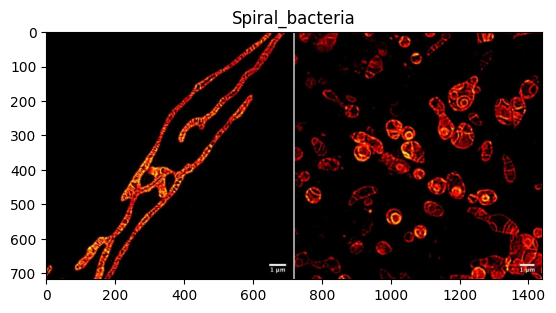

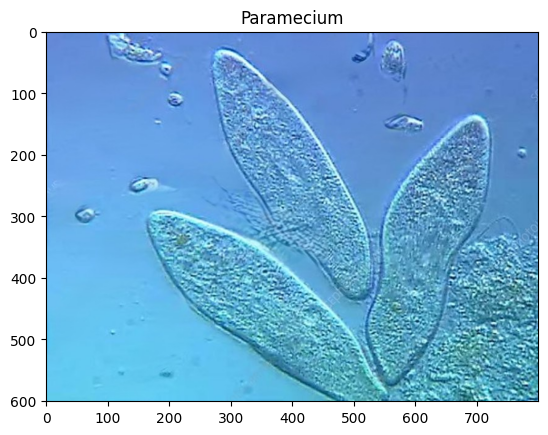

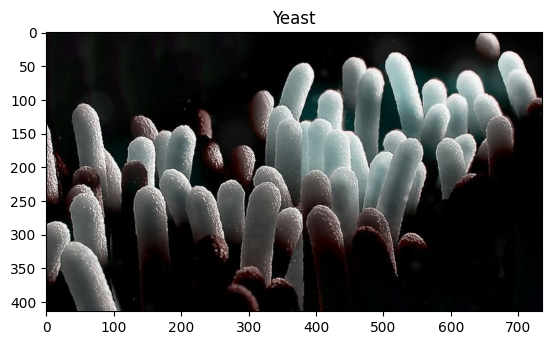

In [21]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"

# Visualize classes and check for structure
classes = os.listdir(dataset_path)
print(f"Classes found: {classes}")

# Example: Visualize a sample image from each class
for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    sample_image = os.listdir(class_dir)[0]  # Take the first image
    img = Image.open(os.path.join(class_dir, sample_image))
    plt.imshow(img)
    plt.title(class_name)
    plt.show()


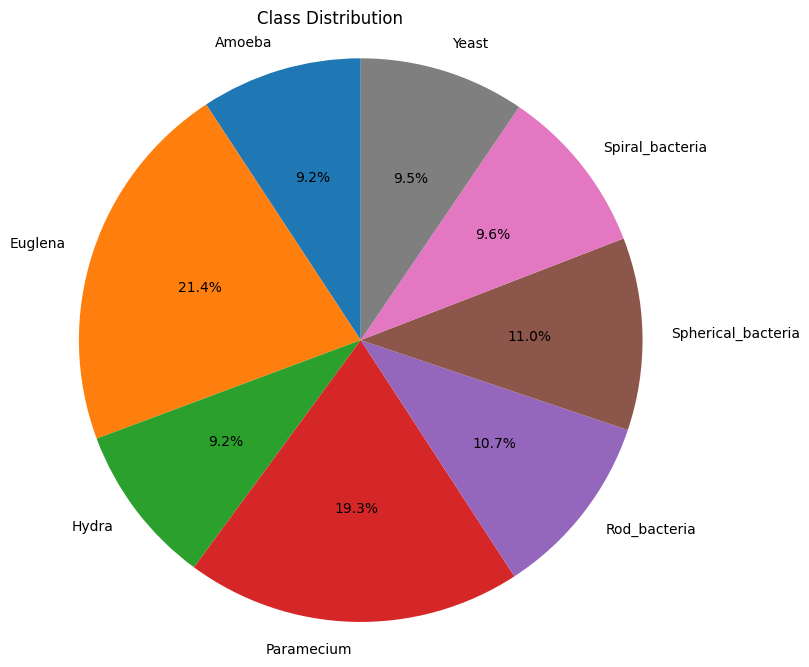

Amoeba: 72 images
Euglena: 167 images
Hydra: 72 images
Paramecium: 150 images
Rod_bacteria: 83 images
Spherical_bacteria: 86 images
Spiral_bacteria: 75 images
Yeast: 74 images


In [22]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset directory
dataset_path = '/kaggle/input/microorganism-image-classification/Micro_Organism'

# Define class names based on actual folders in the dataset
class_names = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']

# List to hold the distribution counts of each class
class_dis = []

# Count the number of images per class
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):
        image_count = len([f for f in os.listdir(class_path) if f.endswith(('.tif', '.jpg', '.png', '.jpeg'))])
        class_dis.append(image_count)
    else:
        print(f"Class folder '{class_name}' not found. Skipping...")
        class_dis.append(0)

# Verify that class_dis contains valid counts
if sum(class_dis) == 0:
    print("No valid images found in the dataset. Please check the dataset structure and file extensions.")
else:
    # Create a pie chart using matplotlib
    plt.figure(figsize=(8, 8))
    plt.pie(class_dis, labels=class_names, autopct='%1.1f%%', startangle=90)
    plt.title("Class Distribution", x=0.45)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
    plt.show()

# Optional: Print counts for debugging
for class_name, count in zip(class_names, class_dis):
    print(f"{class_name}: {count} images")


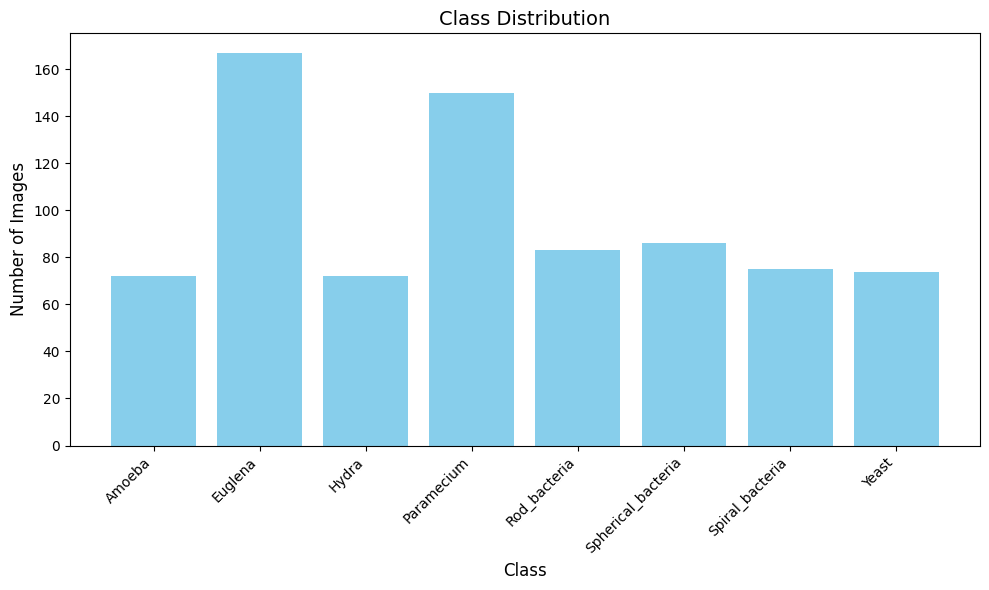

In [23]:
import matplotlib.pyplot as plt
import os

# Define the path to your dataset directory
dataset_path = '/kaggle/input/microorganism-image-classification/Micro_Organism'

# Define class names (directories)
class_names = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria', 'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']

# List to hold the distribution counts of each class
class_dis = []

# Count the number of images per class
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    image_count = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])  # Check for image files
    class_dis.append(image_count)

# Create a bar plot using matplotlib
plt.figure(figsize=(10,6))
plt.bar(class_names, class_dis, color='skyblue')

# Title and labels
plt.title('Class Distribution', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)

# Display the plot
plt.xticks(rotation=45, ha="right")  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
import os
import shutil

# Step 2: Split data into Train, Test, and Validation
# Correct the input path (fixing the typo "Micro_Organismr")
input_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"  # Update with actual dataset path
train_path = "/kaggle/working/data/train"
val_path = "/kaggle/working/data/val"
test_path = "/kaggle/working/data/test"

# List of classes (ensure they match the folder names)
classes = ["Amoeba", "Euglena", "Hydra", "Paramecium", "Rod_bacteria", "Spherical_bacteria", "Spiral_bacteria", "Yeast"]

# Loop through each class and split the data
for class_name in classes:
    class_dir = os.path.join(input_path, class_name)
    
    # Check if the class directory exists
    if os.path.exists(class_dir):
        images = os.listdir(class_dir)  # List all images in the directory
        
        if len(images) < 2:  # Skip classes with less than 2 images
            print(f"Skipping class '{class_name}' due to insufficient data.")
            continue
        
        # Split images into train/test
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        
        # Further split the train set into train/validation
        train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)
        
        # Create directories for train, val, and test sets
        os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_path, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_path, class_name), exist_ok=True)
        
        # Copy images to respective directories
        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_path, class_name, img))
        
        for img in val_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_path, class_name, img))
        
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_path, class_name, img))
        
        print(f"Class '{class_name}' split into train, validation, and test.")
    else:
        print(f"Class directory '{class_name}' does not exist in {input_path}.")


Class 'Amoeba' split into train, validation, and test.
Class 'Euglena' split into train, validation, and test.
Class 'Hydra' split into train, validation, and test.
Class 'Paramecium' split into train, validation, and test.
Class 'Rod_bacteria' split into train, validation, and test.
Class 'Spherical_bacteria' split into train, validation, and test.
Class 'Spiral_bacteria' split into train, validation, and test.
Class 'Yeast' split into train, validation, and test.


In [25]:
import os

input_path = "/kaggle/input/microorganism-image-classification/Micro_Organism"
print("Classes found:", os.listdir(input_path))


Classes found: ['Amoeba', 'Euglena', 'Spherical_bacteria', 'Hydra', 'Rod_bacteria', 'Spiral_bacteria', 'Paramecium', 'Yeast']


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 3: Data Preprocessing (Normalization and Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation and test

# Set up the data generators
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Resizing the images to the input size of the model
    batch_size=32,
    class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to avoid shuffling for final evaluation
)


Found 789 images belonging to 8 classes.
Found 128 images belonging to 8 classes.
Found 161 images belonging to 8 classes.


In [27]:
#Build the ResNet Model

# # Define the ResNet Block

In [28]:
from tensorflow.keras.layers import Layer, Conv2D, BatchNormalization, ReLU
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras import Model  # Import the Model class
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [30]:
class ResidualUnit(Layer):  
    def __init__(self, output_channels, stride=1):
        super(ResidualUnit, self).__init__()
        self.conv1 = Conv2D(output_channels, 3, strides=stride, padding='same')
        self.bn1 = BatchNormalization()
        self.relu = ReLU()
        self.conv2 = Conv2D(output_channels, 3, strides=1, padding='same')
        self.bn2 = BatchNormalization()

        # Shortcut connection
        if stride != 1:
            self.shortcut = Sequential([
                Conv2D(output_channels, 1, strides=stride, padding='same'),
                BatchNormalization()
            ])
        else:
            self.shortcut = lambda x: x  # Identity mapping for stride = 1

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)

        shortcut = self.shortcut(inputs)
        return self.relu(x + shortcut)


In [31]:
# Define the ResNet Model

In [32]:
# Define the Custom ResNet Model
class CustomResNet(Model):  # Updated name
    def __init__(self, num_classes):
        super(CustomResNet, self).__init__()
        self.initial_block = Sequential([  #  initial block
            Conv2D(64, 7, strides=2, padding='same'),
            BatchNormalization(),
            ReLU(),
            MaxPooling2D(3, strides=2, padding='same')
        ])

        # Residual layers renamed
        self.residual_layers = Sequential([  # residual blocks
            ResidualUnit(64),
            ResidualUnit(64),
            ResidualUnit(128, stride=2),
            ResidualUnit(128),
            ResidualUnit(256, stride=2),
            ResidualUnit(256),
            ResidualUnit(512, stride=2),
            ResidualUnit(512),
        ])

        self.global_pool = GlobalAveragePooling2D()
        self.classifier = Dense(num_classes, activation='softmax')  # Updated name for classification layer

    def call(self, inputs):
        x = self.initial_block(inputs)  
        x = self.residual_layers(x)  
        x = self.global_pool(x)
        return self.classifier(x)  


In [33]:
num_classes = len(train_data.class_indices)
model = CustomResNet(num_classes=num_classes)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [34]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.1670 - loss: 2.0713 - val_accuracy: 0.2109 - val_loss: 2.0006
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.2199 - loss: 1.9877 - val_accuracy: 0.2734 - val_loss: 1.9811
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.2323 - loss: 2.0005 - val_accuracy: 0.2422 - val_loss: 1.9762
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.2519 - loss: 1.9987 - val_accuracy: 0.2500 - val_loss: 1.9436
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.2523 - loss: 1.9631 - val_accuracy: 0.2656 - val_loss: 1.9098
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.2678 - loss: 1.9112 - val_accuracy: 0.2422 - val_loss: 1.9287
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.2614 - loss: 1.9168 - val_accuracy: 0.2500 - val_loss: 1.8971
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.2957 - loss: 1.8729 - val_accuracy: 0.2969 - v

In [35]:
 # Accuracy

In [36]:
# Calculate and display accuracy
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.2f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 871ms/step - accuracy: 0.5037 - loss: 1.2813
Test Accuracy: 0.48


In [37]:
# Assuming `test_loss, test_acc` are the results from model.evaluate
test_loss, test_acc = model.evaluate(test_data)

# Display accuracy as a percentage
print(f"Test Accuracy: {test_acc * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 878ms/step - accuracy: 0.5037 - loss: 1.2813
Test Accuracy: 48.45%


In [38]:
 # Confusion Matrix and Visualization

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 986ms/step


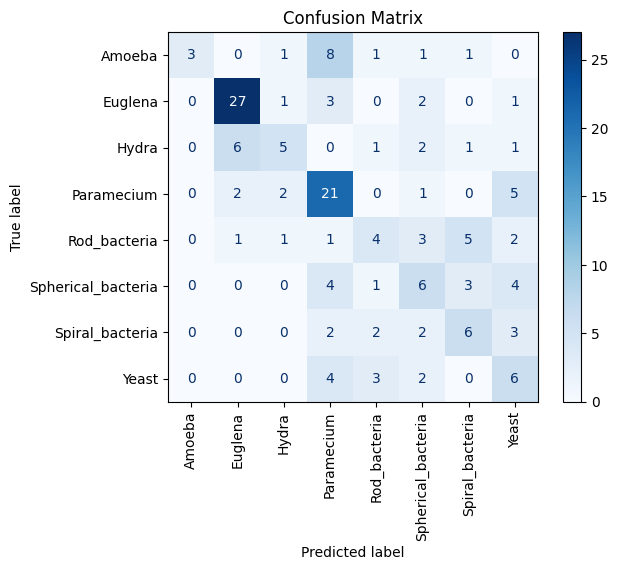

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = test_data.classes  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(len(test_data.class_indices)))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


In [40]:
 # Precision, Recall, and F-Score

In [41]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), digits=4)
print("Classification Report:")
print(report)


Classification Report:
                    precision    recall  f1-score   support

            Amoeba     1.0000    0.2000    0.3333        15
           Euglena     0.7500    0.7941    0.7714        34
             Hydra     0.5000    0.3125    0.3846        16
        Paramecium     0.4884    0.6774    0.5676        31
      Rod_bacteria     0.3333    0.2353    0.2759        17
Spherical_bacteria     0.3158    0.3333    0.3243        18
   Spiral_bacteria     0.3750    0.4000    0.3871        15
             Yeast     0.2727    0.4000    0.3243        15

          accuracy                         0.4845       161
         macro avg     0.5044    0.4191    0.4211       161
      weighted avg     0.5261    0.4845    0.4731       161



In [42]:
# ROC and AUC Visualization

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 940ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 873ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 869ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 864ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 970ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 910ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 874ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 870ms/step


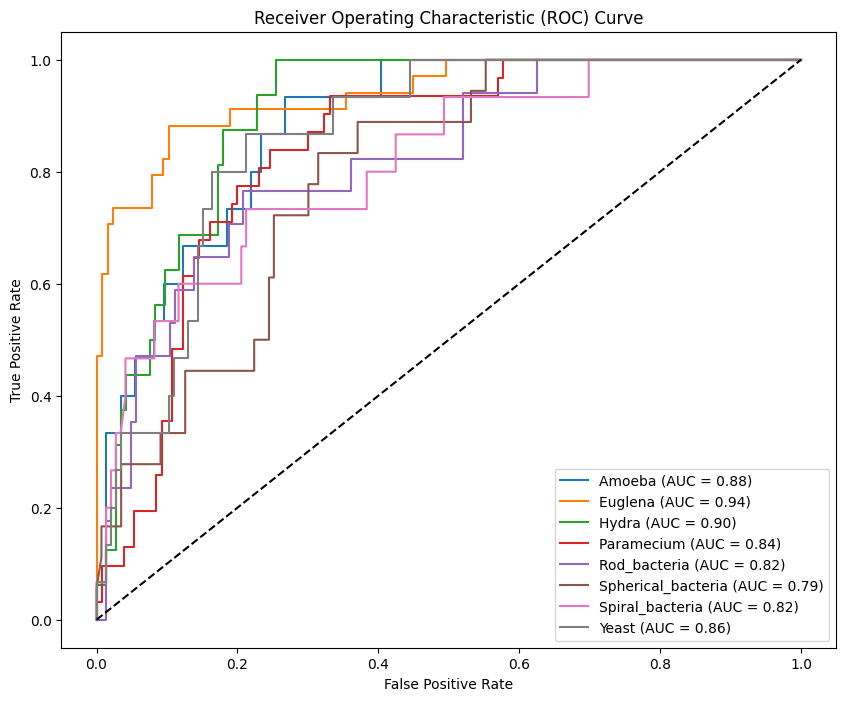

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_binarized = label_binarize(y_true, classes=range(len(test_data.class_indices)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(test_data.class_indices)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], model.predict(test_data)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for all classes
plt.figure(figsize=(10, 8))
for i, label in enumerate(test_data.class_indices.keys()):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="best")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
Predicted class: Spiral_bacteria


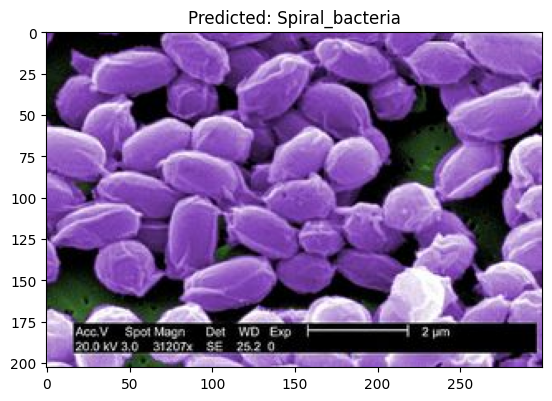

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define the preprocess_image function
def preprocess_image(image_path):
    # Load the image with target size of (224, 224)
    img = image.load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array and scale pixel values
    img_array = image.img_to_array(img) / 255.0
    # Add batch dimension (model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Define the image path (replace with your own image)
image_path = "/kaggle/input/microorganism-image-classification/Micro_Organism/Rod_bacteria/Image_29.jpeg"

# Preprocess the image
img_array = preprocess_image(image_path)

# Make the prediction
predictions = model.predict(img_array)

# Get the predicted class and label
predicted_class = np.argmax(predictions, axis=1)
class_names = list(train_data.class_indices.keys())
predicted_class_name = class_names[predicted_class[0]]

# Print and visualize
print(f"Predicted class: {predicted_class_name}")
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.show()


In [45]:
# Xception model

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models

# Step 1: Prepare the dataset
train_dir = '/kaggle/working/data/train'
valid_dir = '/kaggle/working/data/val'
test_dir = '/kaggle/working/data/test'

# Define ImageDataGenerators with augmentation for the training set and rescaling for the validation/test sets
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary'  # Change to 'categorical' for multi-class
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='binary'
)


Found 789 images belonging to 8 classes.
Found 128 images belonging to 8 classes.
Found 161 images belonging to 8 classes.


In [48]:
IMG_HEIGHT = 224
IMG_WIDTH = 224


In [49]:
IMG_HEIGHT = 299  # Set to the input size for Xception
IMG_WIDTH = 299
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/working/data/train',  # Specify the path to your train data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/kaggle/working/data/val',  # Specify the path to your validation data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 789 images belonging to 8 classes.
Found 128 images belonging to 8 classes.


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories
train_dir = "/kaggle/working/data/train"
val_dir = "/kaggle/working/data/val"

# Data augmentation and rescaling for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Rescaling only for validation and test data
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  # Xception requires 299x299 input size
    batch_size=32,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode="categorical"
)


Found 789 images belonging to 8 classes.
Found 128 images belonging to 8 classes.


In [53]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

weights_path = "/kaggle/input/weight/tensorflow2/default/1/xception_weights_tf_dim_ordering_tf_kernels_notop (6).h5"  # Replace with actual path

base_model = Xception(
    weights=weights_path,
    include_top=False,
    input_shape=(299, 299, 3)
)


In [54]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Add global average pooling layer and fully connected dense layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Regularization to prevent overfitting
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(class_names), activation="softmax")(x)  # Output layer for multi-class classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output_layer)


In [56]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",  # Use "categorical_crossentropy" for multi-class classification
    metrics=["accuracy"]
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 195s 7s/step - accuracy: 0.2540 - loss: 2.0002 - val_accuracy: 0.5938 - val_loss: 1.3613
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 184s 7s/step - accuracy: 0.4715 - loss: 1.4710 - val_accuracy: 0.6484 - val_loss: 1.0763
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 188s 7s/step - accuracy: 0.5478 - loss: 1.2256 - val_accuracy: 0.7422 - val_loss: 0.8592
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 186s 7s/step - accuracy: 0.6213 - loss: 1.1082 - val_accuracy: 0.7812 - val_loss: 0.7421
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 187s 7s/step - accuracy: 0.6633 - loss: 1.0035 - val_accuracy: 0.7891 - val_loss: 0.7102
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 184s 7s/step - accuracy: 0.6513 - loss: 0.9918 - val_accuracy: 0.8047 - val_loss: 0.6207
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 184s 7s/step - accuracy: 0.7030 - loss: 0.8720 - val_accuracy: 0.8281 - val_loss: 0.5813
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 187s 7s/step - accuracy: 0.6658 - loss: 0.9014 - val_accuracy: 0.8203 - val_loss: 0.

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
import numpy as np

# Get true labels and predicted probabilities
y_true = test_data.classes  # True labels
y_pred_probs = model.predict(test_data)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class indices

# Class names
class_names = list(test_data.class_indices.keys())


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print("Classification Report:")
print(report)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 7))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Update ImageDataGenerator for test data
test_data = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),  # Change this to 299x299
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for evaluation
)


In [ ]:
# Inspect batch shape
batch_images, batch_labels = next(iter(test_data))
print("Image batch shape:", batch_images.shape)


In [ ]:
import numpy as np

# Get true labels and predicted probabilities
y_true = test_data.classes  # True labels
y_pred_probs = model.predict(test_data)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class indices

# Binarize the labels for multi-class ROC curve
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

# Plot settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# اعمل تيست هنا ي دياب 

****Desnet****

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset
train_dir = "/kaggle/working/data/train"
val_dir = "/kaggle/working/data/val"
test_dir = "/kaggle/working/data/test"

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Match DenseNet input size
    batch_size=32,
    class_mode='categorical'
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Define the path to your local weights file
local_weights_path = "/kaggle/input/resnet/tensorflow2/default/1/densenet121_weights_tf_dim_ordering_tf_kernels_notop (1).h5"

# Load DenseNet121 with local weights
base_model = DenseNet121(weights=local_weights_path, include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Flatten feature maps
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("DenseNet model built successfully with local weights!")


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stopping]
)

print("Training complete!")


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.class_indices.keys())
disp.plot(cmap='viridis', xticks_rotation='vertical')


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys(), digits=4)
print(report)


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize true labels for multi-class ROC
y_true_bin = label_binarize(y_true, classes=range(train_data.num_classes))

# Plot ROC for each class
plt.figure(figsize=(10, 8))
for i in range(train_data.num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {list(test_data.class_indices.keys())[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Class names
class_names = list(test_data.class_indices.keys())

# Function to predict and display results
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100

    # Display results
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# Example usage
image_path = "/kaggle/input/microorganism-image-classification/Micro_Organism/Paramecium/Image_121.jpg"
predict_image(image_path, model)
